In [ ]:
# Copyright (c) 2025 Sana Arshad
# Licensed under the MIT License. See LICENSE file in the project root for details.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Loading the dataset
df=pd.read_csv('AIMLfinal.csv',nrows=10000, encoding='ISO-8859-1')

In [ ]:
df.head()

,ï»¿date,AI,DBSI,NDVI,NDWI,NDBI,NDSI,SAVI,TGSI,SPI,Tmean
0,01/01/1990,0.033595,0.102976,0.016186,-0.264504,0.042145,-0.161859,0.010791,0.166363,0.000000,15.383333
1,01/02/1990,0.858963,-0.027111,0.243976,-0.116706,-0.065893,-0.243976,0.100317,0.080429,0.000000,16.250000
2,01/03/1990,0.043664,-0.038178,0.145794,-0.283500,-0.024222,-0.245794,0.017041,0.171567,1.103954,19.933333
3,01/04/1990,0.056079,0.109485,0.119944,-0.229061,0.041081,-0.119944,0.086768,0.156798,1.055533,27.200000
4,01/05/1990,0.013029,0.159556,0.091021,-0.261343,0.079238,-0.102101,0.077641,0.183300,-0.503680,34.466667


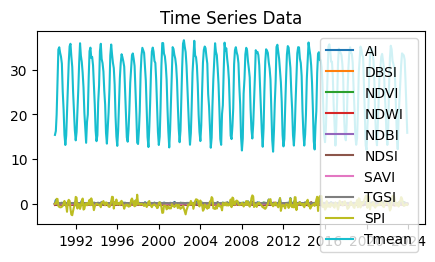

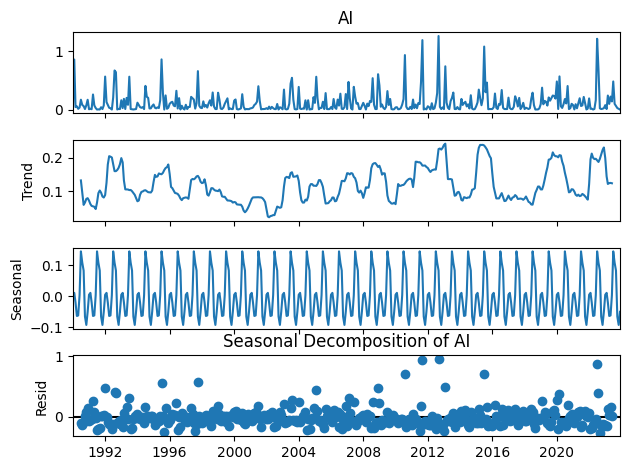

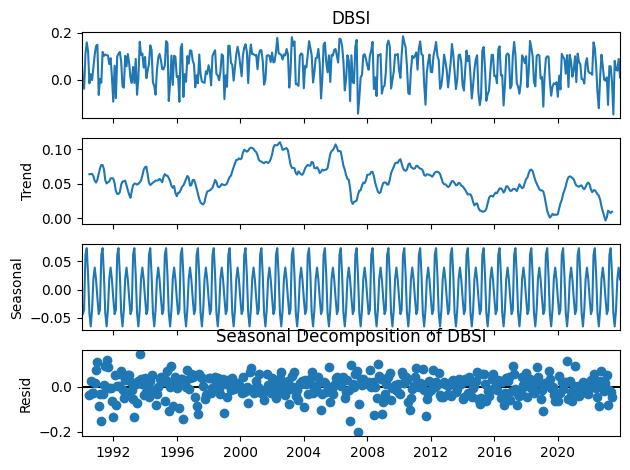

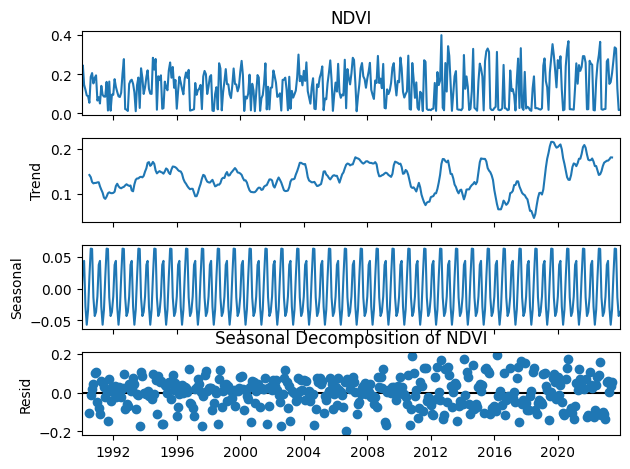

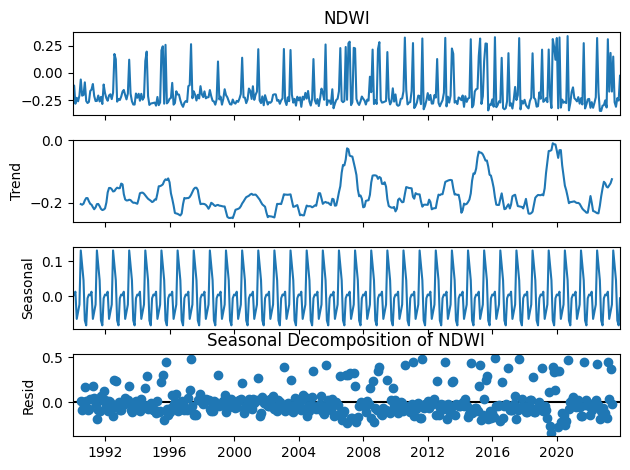

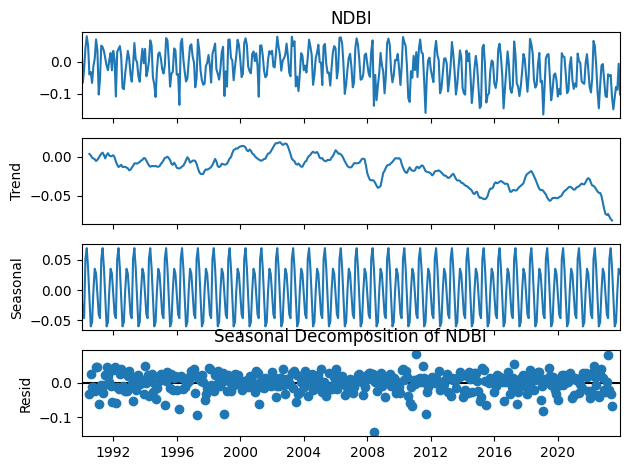

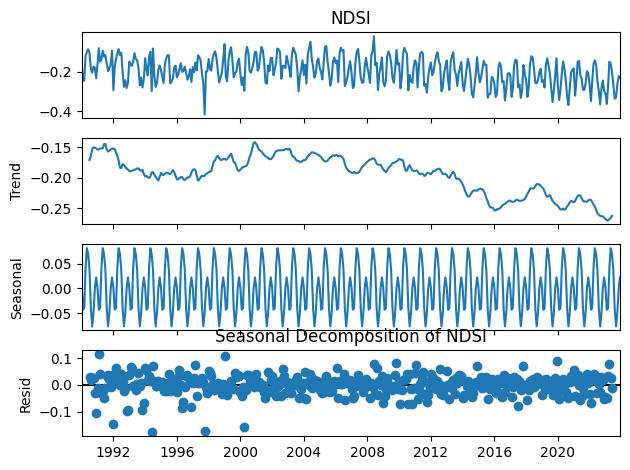

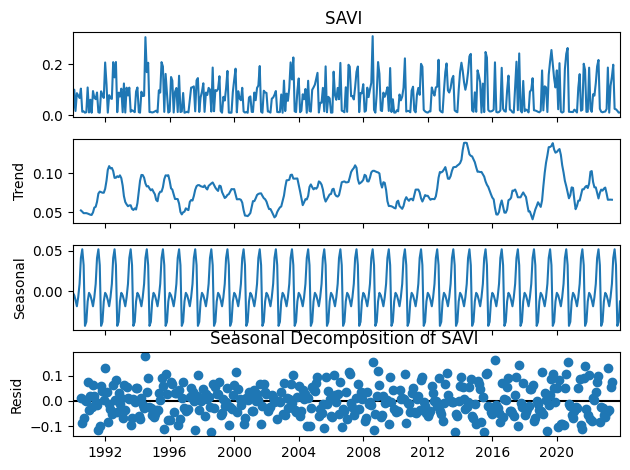

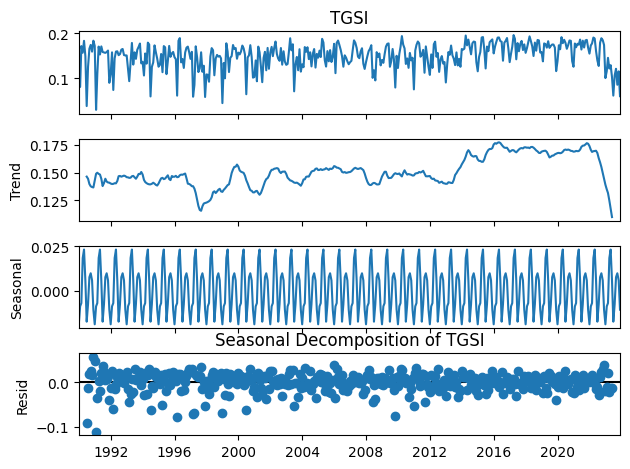

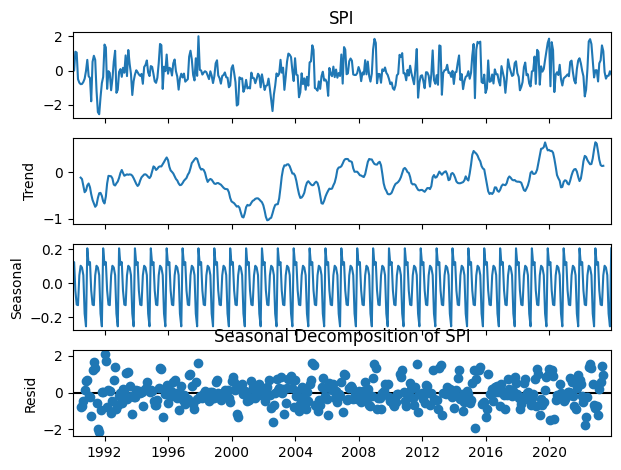

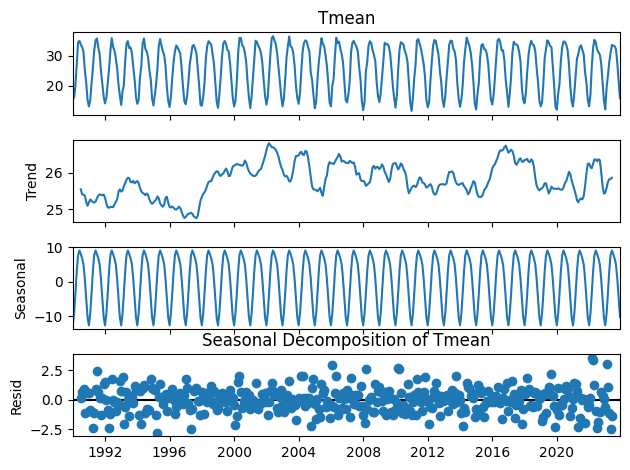

Seasonal Correlation Matrix:
             AI      DBSI      NDVI      NDWI      NDBI      NDSI     SAVI   \
AI     1.000000 -0.789931  0.727585  0.955206 -0.659411 -0.246833  0.938849   
DBSI  -0.789931  1.000000 -0.908209 -0.805519  0.951689  0.666809 -0.651718   
NDVI   0.727585 -0.908209  1.000000  0.699971 -0.960239 -0.765363  0.629772   
NDWI   0.955206 -0.805519  0.699971  1.000000 -0.651375 -0.210393  0.901776   
NDBI  -0.659411  0.951689 -0.960239 -0.651375  1.000000  0.842488 -0.518605   
NDSI  -0.246833  0.666809 -0.765363 -0.210393  0.842488  1.000000 -0.083053   
SAVI   0.938849 -0.651718  0.629772  0.901776 -0.518605 -0.083053  1.000000   
TGSI  -0.524742  0.741746 -0.423904 -0.645704  0.566107  0.266827 -0.378637   
SPI    0.609939 -0.606008  0.406818  0.684327 -0.436343 -0.081013  0.620142   
Tmean  0.383146  0.099061  0.079939  0.252540  0.112127  0.288141  0.475591   

           TGSI       SPI     Tmean  
AI    -0.524742  0.609939  0.383146  
DBSI   0.741746 -0.606008

<ipython-input-45-d68b9d6a1fbb>:65: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, ccs, use_line_collection=True)


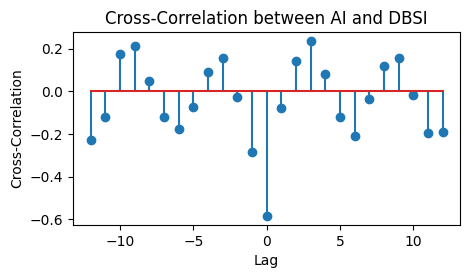

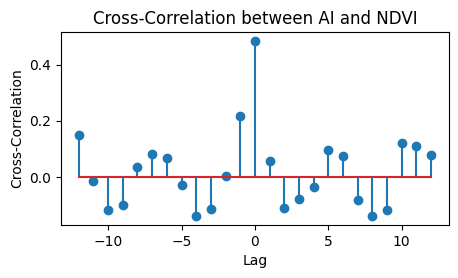

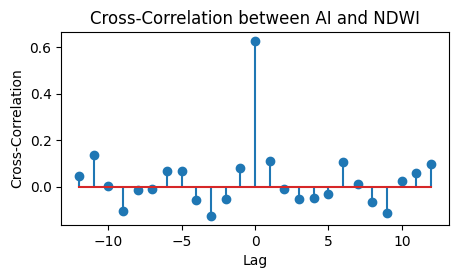

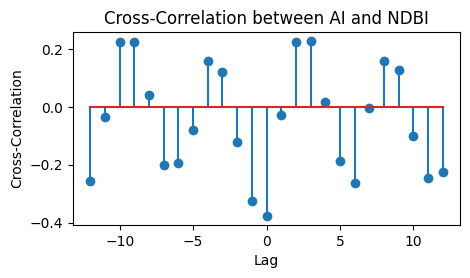

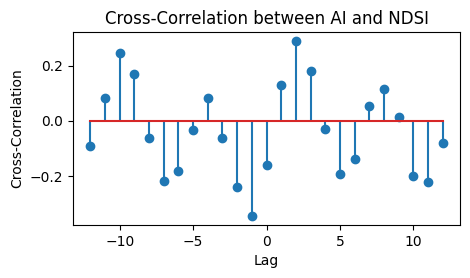

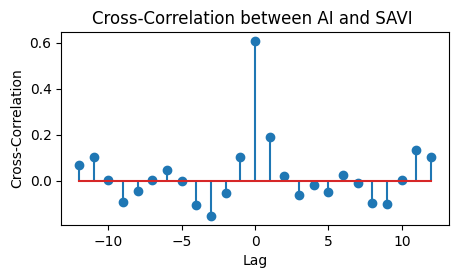

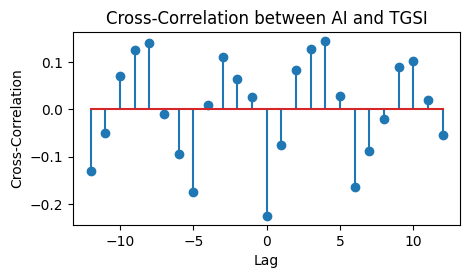

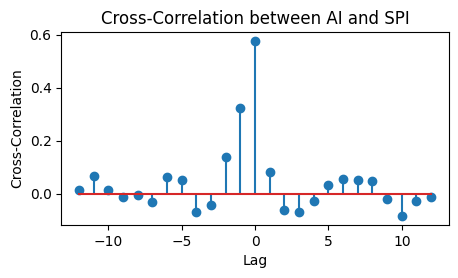

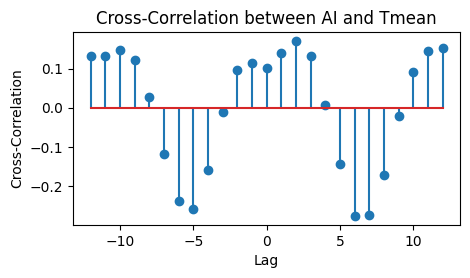

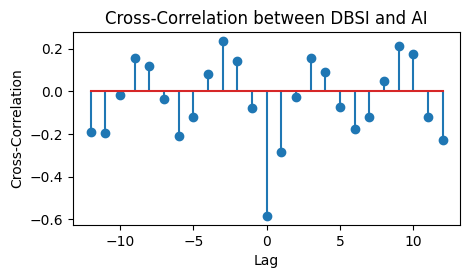

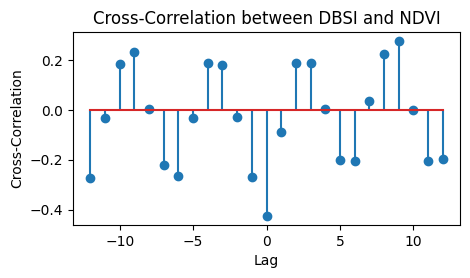

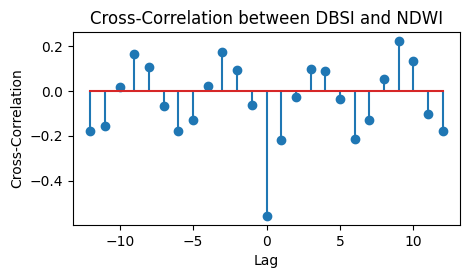

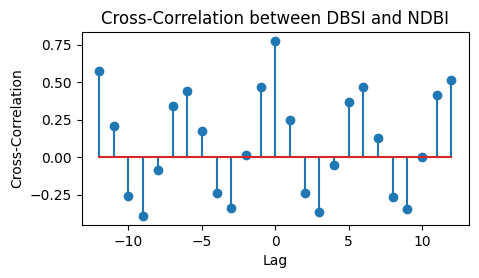

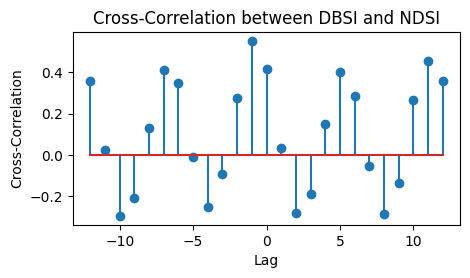

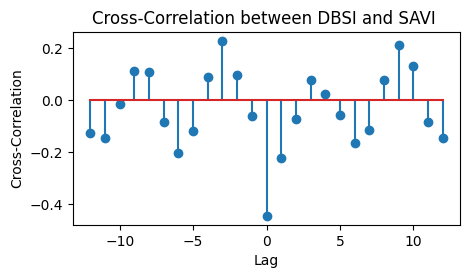

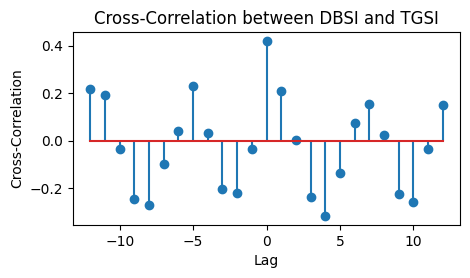

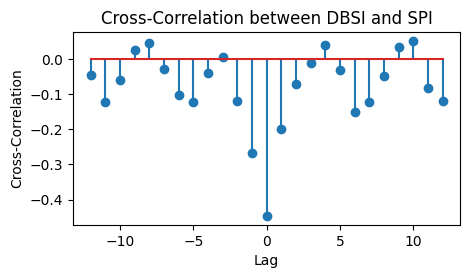

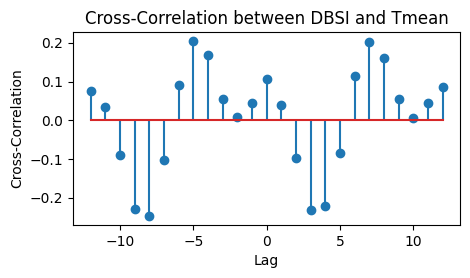

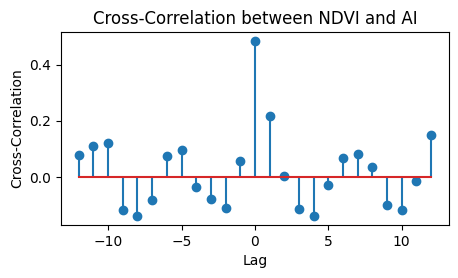

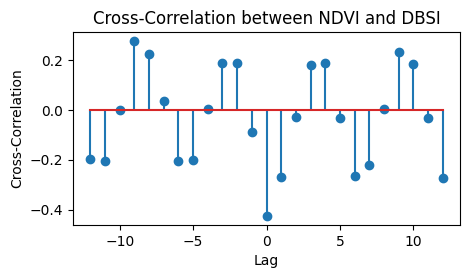

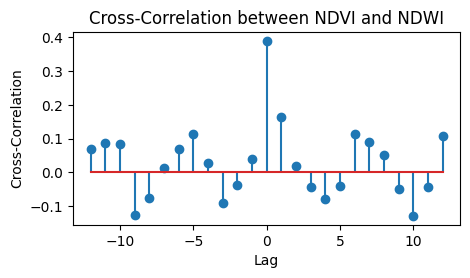

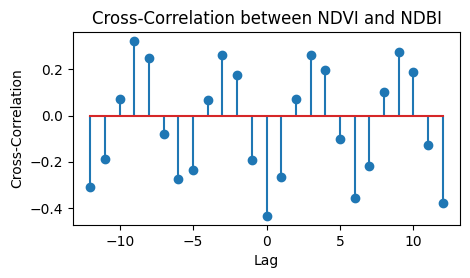

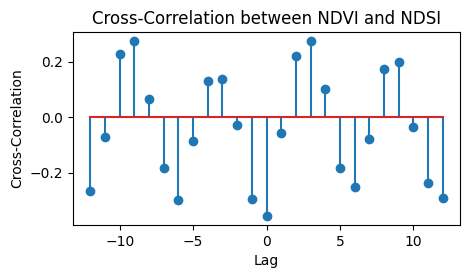

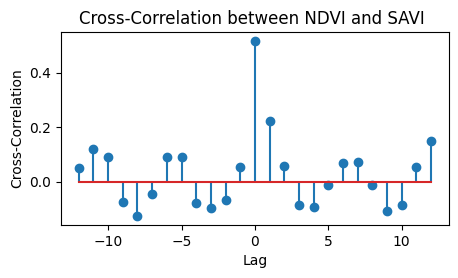

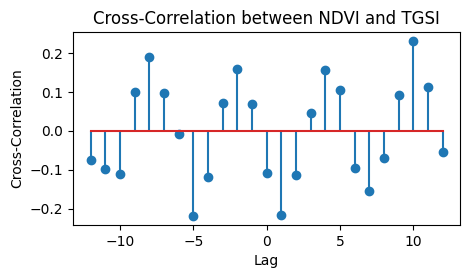

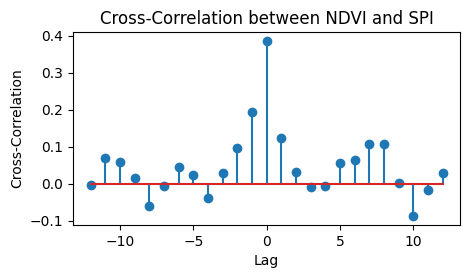

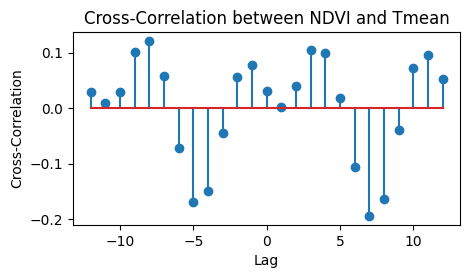

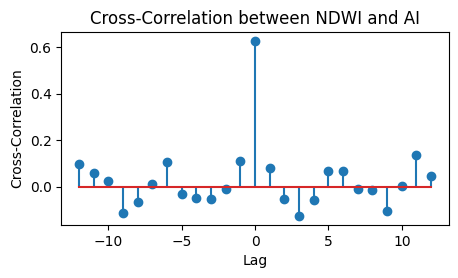

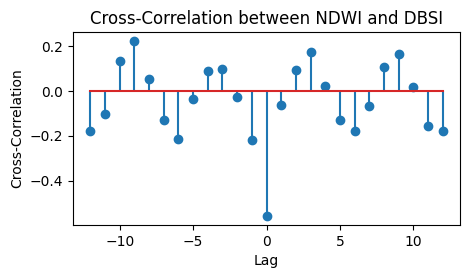

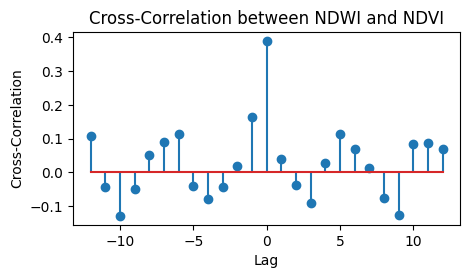

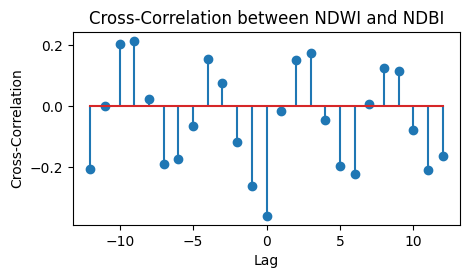

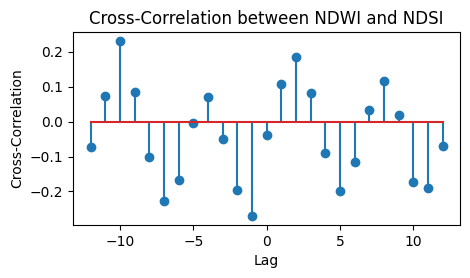

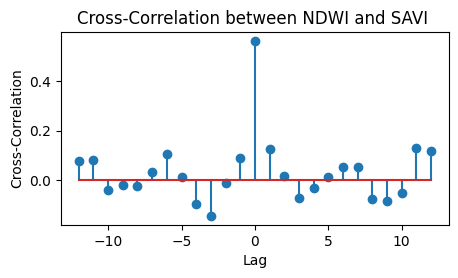

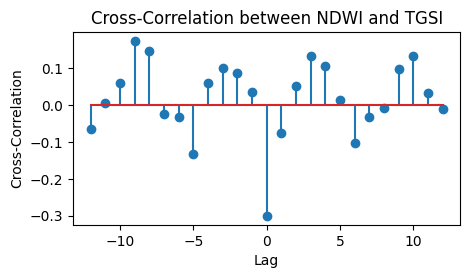

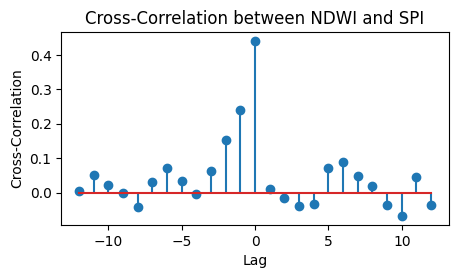

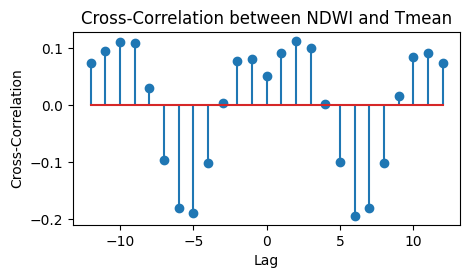

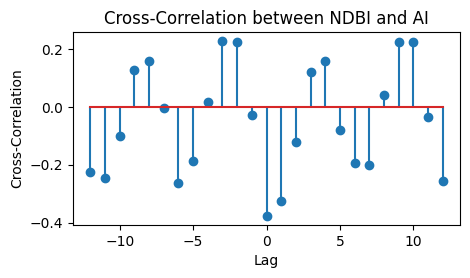

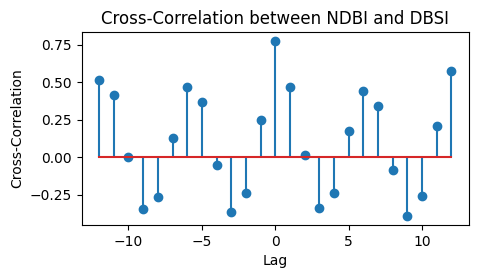

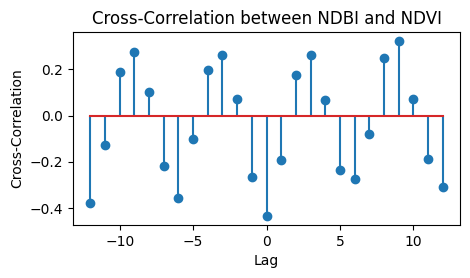

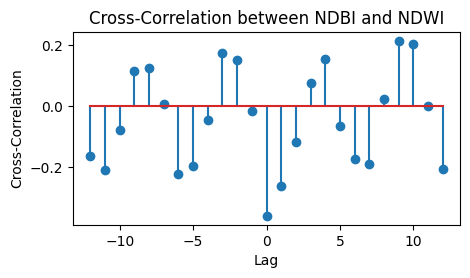

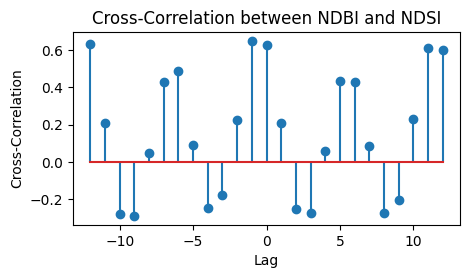

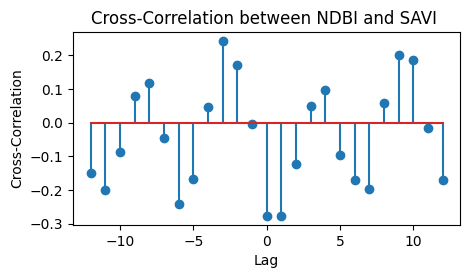

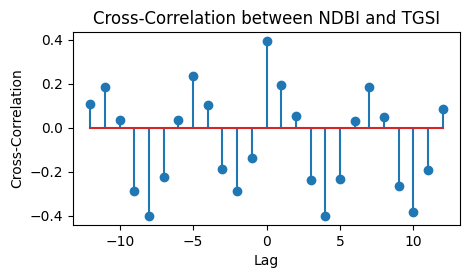

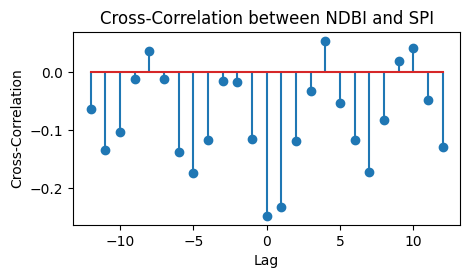

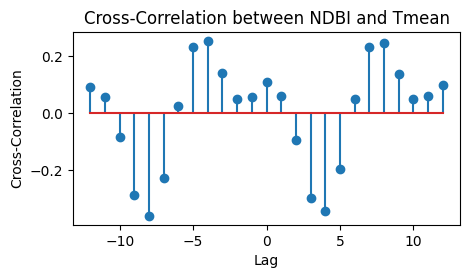

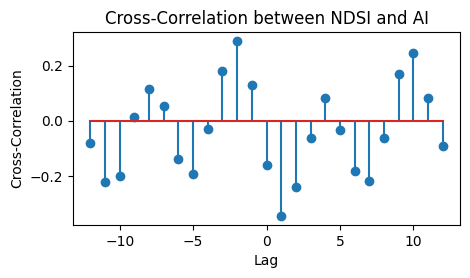

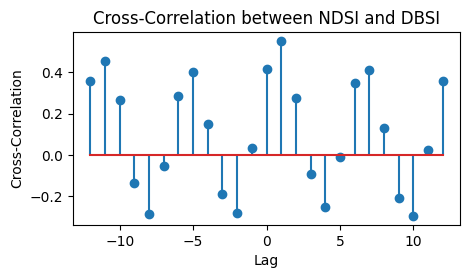

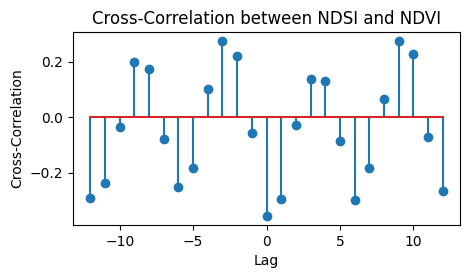

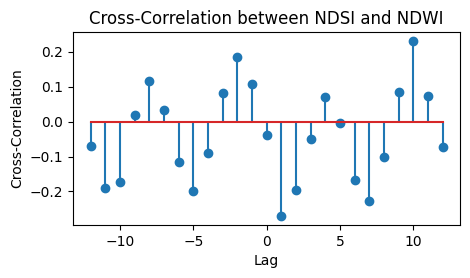

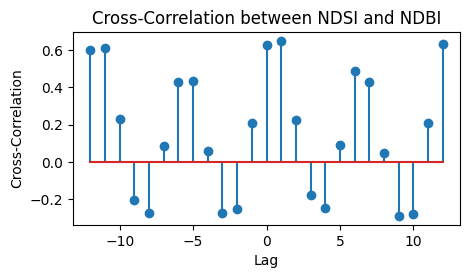

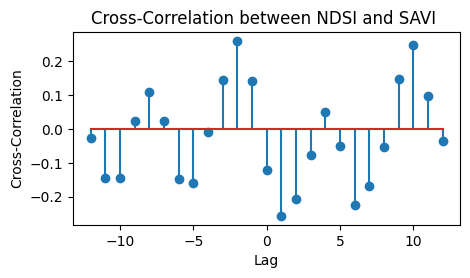

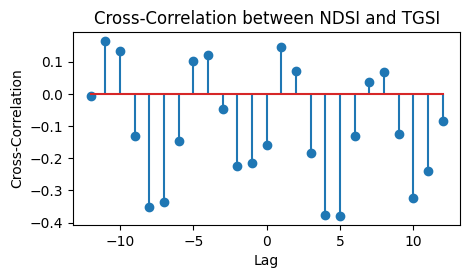

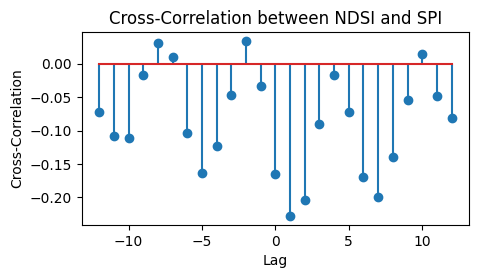

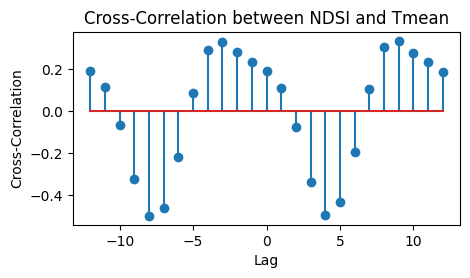

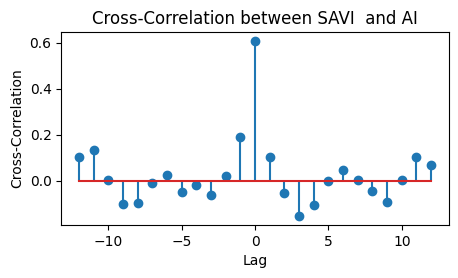

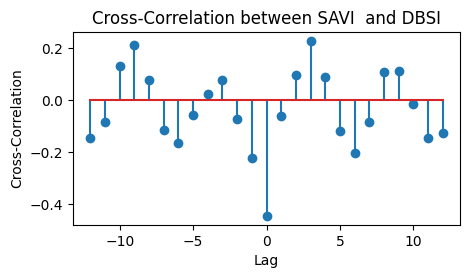

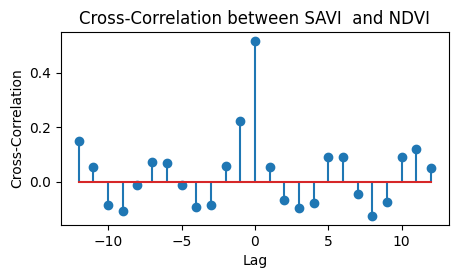

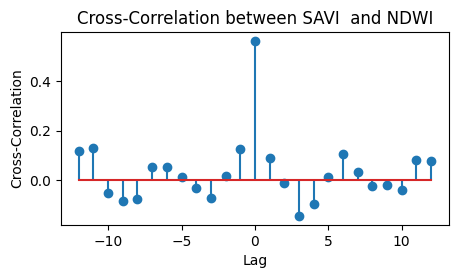

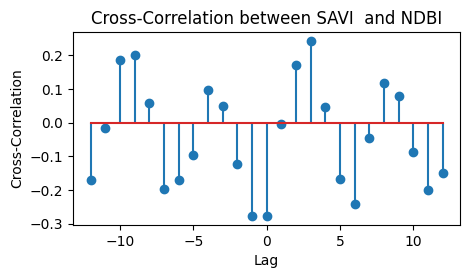

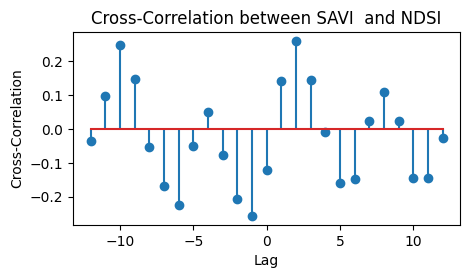

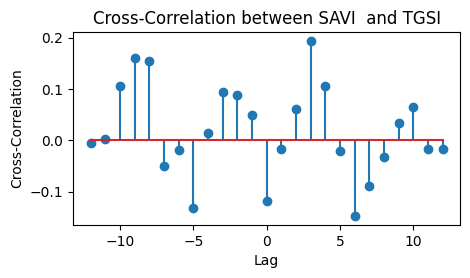

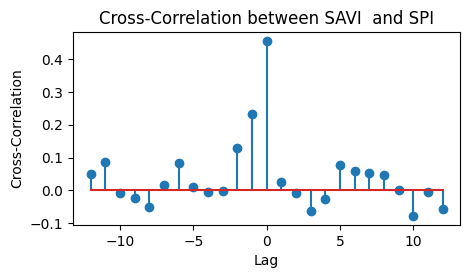

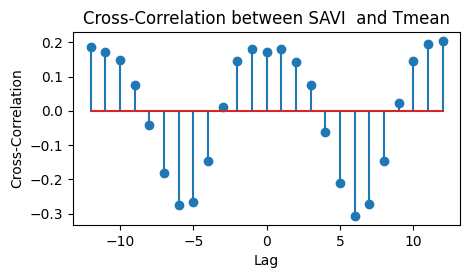

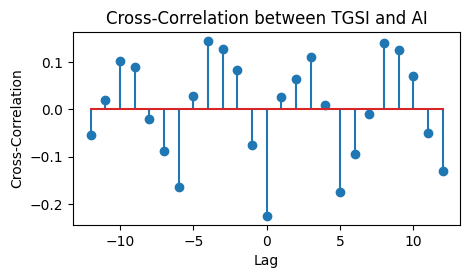

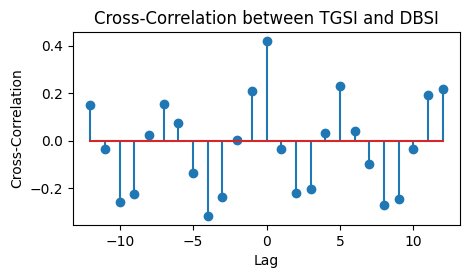

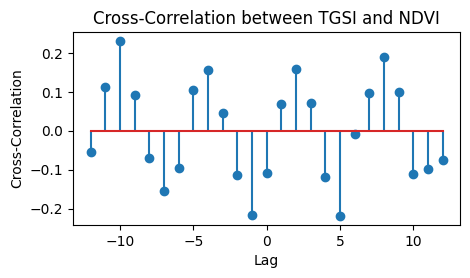

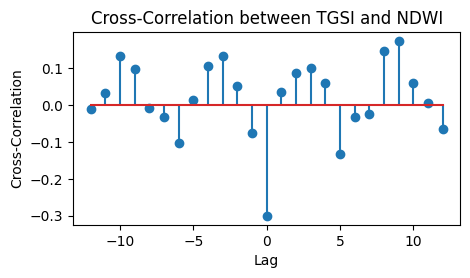

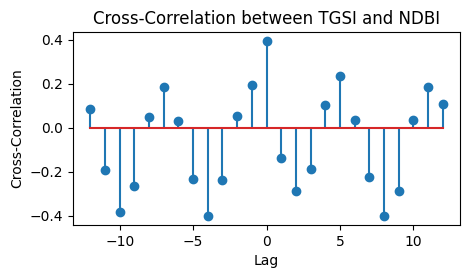

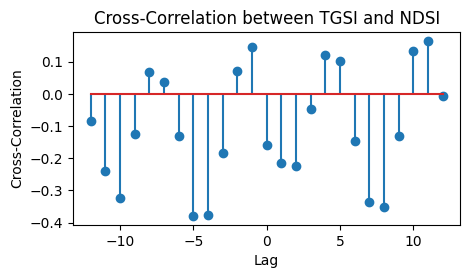

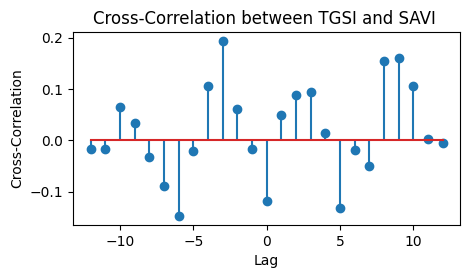

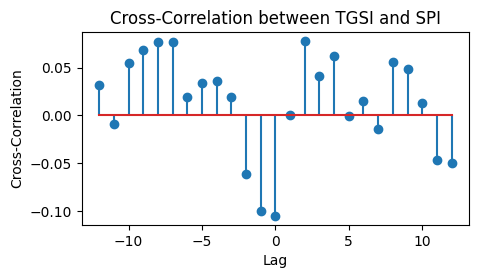

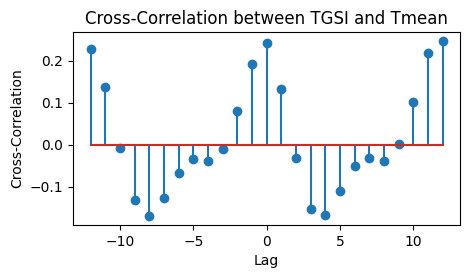

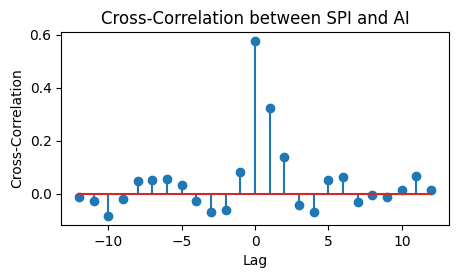

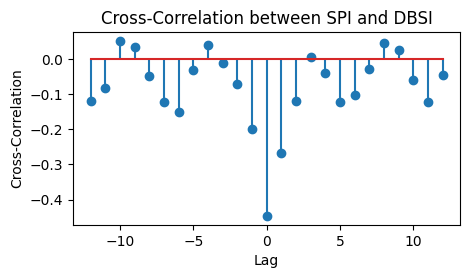

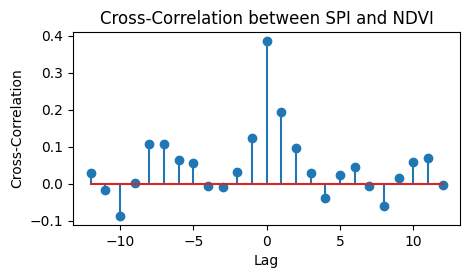

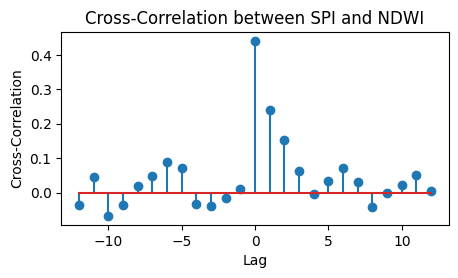

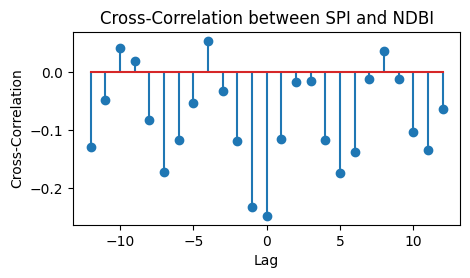

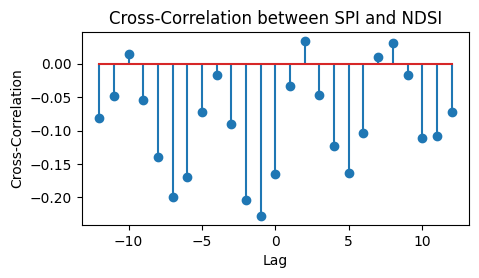

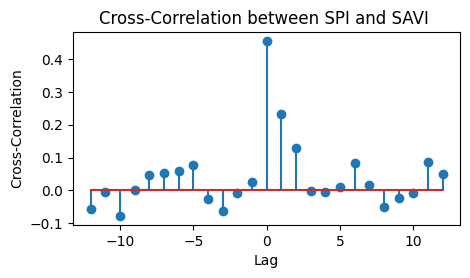

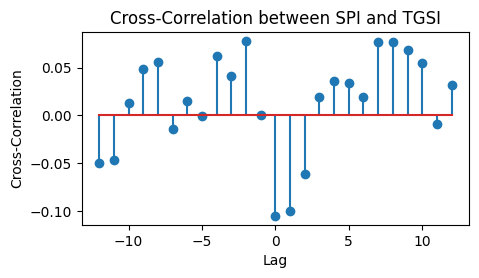

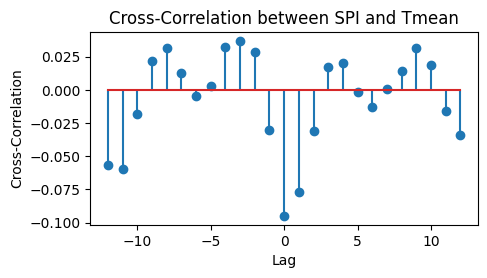

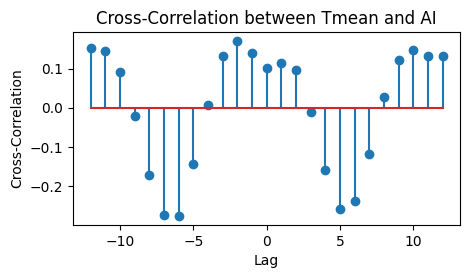

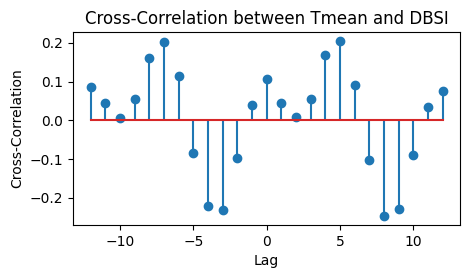

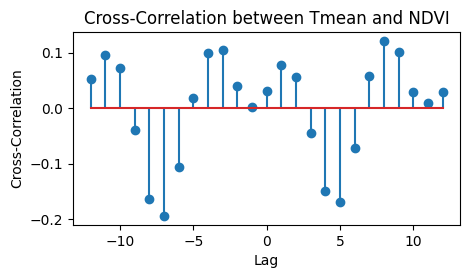

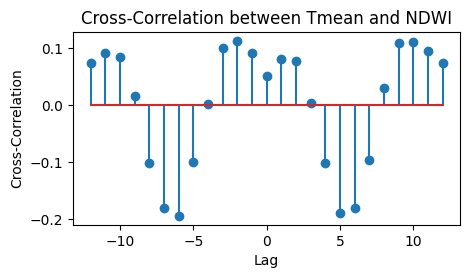

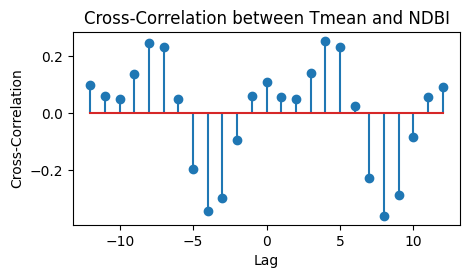

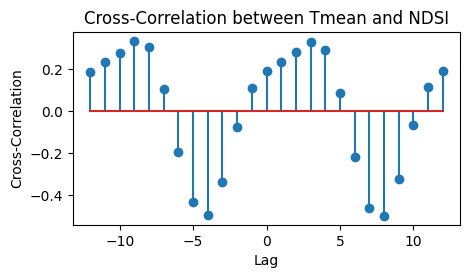

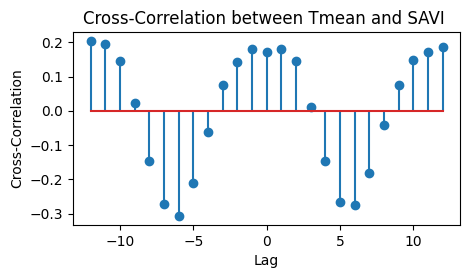

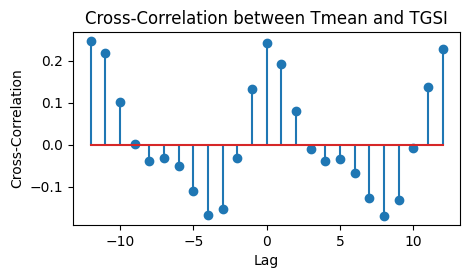

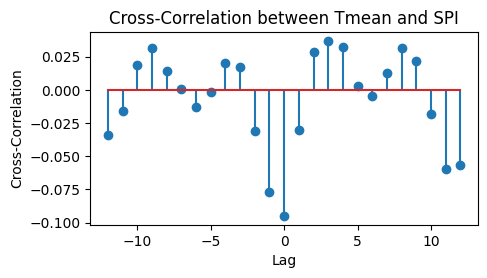

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
import numpy as np

# Data loading
df = pd.read_csv('AIMLfinal.csv', nrows=10000, encoding='ISO-8859-1')

# Ensure the date column is parsed correctly
df['ï»¿date'] = pd.to_datetime(df['ï»¿date'], dayfirst=True)
df.set_index('ï»¿date', inplace=True)

# Visualize the data
plt.figure(figsize=(5, 2.5))
for column in df.columns:
    plt.plot(df[column], label=column)
plt.legend()
plt.title('Time Series Data')
plt.show()

# Decompose the time series and visualize
decomposition_results = {}

for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='additive', period=12)
    decomposition_results[column] = decomposition
    decomposition.plot()
    plt.title(f'Seasonal Decomposition of {column}')
    plt.show()

# Extract seasonal components and compute correlation
seasonal_components = pd.DataFrame()

for column, result in decomposition_results.items():
    seasonal_components[column] = result.seasonal

seasonal_correlation = seasonal_components.corr()
print("Seasonal Correlation Matrix:")
print(seasonal_correlation)

# Statistical tests
print("\nStatistical Tests for Seasonal Components Correlation:")
for col1 in seasonal_components.columns:
    for col2 in seasonal_components.columns:
        if col1 != col2:
            corr, p_value = pearsonr(seasonal_components[col1], seasonal_components[col2])
            print(f'Correlation between {col1} and {col2}: {corr:.2f}, p-value: {p_value:.5f}')

# Cross-correlation function
def cross_correlation(ts1, ts2, lag_max):
    lags = range(-lag_max, lag_max + 1)
    ccs = [ts1.corr(ts2.shift(lag)) for lag in lags]
    return lags, ccs

# Define the maximum lag (e.g., 12 for monthly data)
lag_max = 12

# Compute cross-correlations for each pair of variables
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            lags, ccs = cross_correlation(df[col1], df[col2], lag_max)
            plt.figure(figsize=(5, 2.5))
            plt.stem(lags, ccs, use_line_collection=True)
            plt.title(f'Cross-Correlation between {col1} and {col2}')
            plt.xlabel('Lag')
            plt.ylabel('Cross-Correlation')
            plt.show()


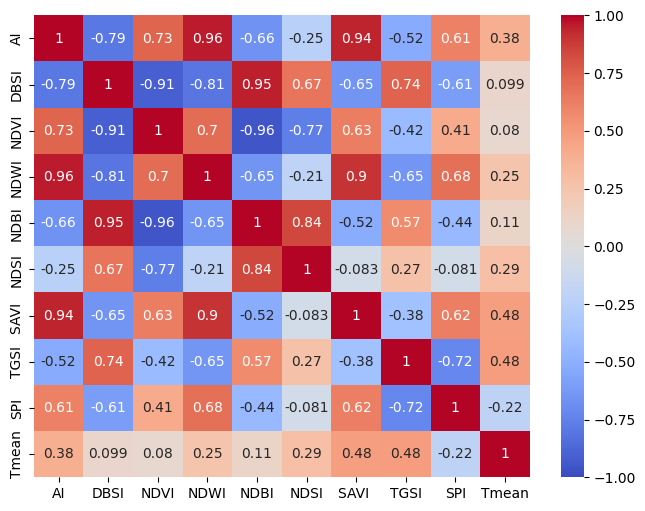

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is already loaded and preprocessed
# Decompose the time series and extract seasonal components
decomposition_results = {}

for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='additive', period=12)
    decomposition_results[column] = decomposition

# Extract seasonal components and compute correlation matrix
seasonal_components = pd.DataFrame()

for column, result in decomposition_results.items():
    seasonal_components[column] = result.seasonal

seasonal_correlation = seasonal_components.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(seasonal_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.title('Heatmap of Seasonal Correlation Matrix')
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Create lagged variables
def create_lagged_features(df, lag=1):
    df_lagged = df.copy()
    for col in df.columns:
        for i in range(1, lag + 1):
            df_lagged[f'{col}_lag_{i}'] = df[col].shift(i)
    return df_lagged

# Create lagged features with a lag of 3 for demonstration
df_lagged = create_lagged_features(df, lag=3)
df_lagged.dropna(inplace=True)

# Separate features and target variable
X = df_lagged.drop(columns=['AI'])
y = df_lagged['AI']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
# Define the model
lr_model = LinearRegression()
# Fit the model
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:

# Make predictions and evaluate
y_train_pred_mlr = lr_model.predict(X_train)
train_mse_mlr = mean_squared_error(y_train, y_train_pred_mlr)
train_r2_mlr = r2_score(y_train, y_train_pred_mlr)
print("\nTraining Set:")
print("Mean Squared Error:", train_mse_mlr)
print("R-squared:", train_r2_mlr)

y_test_pred_mlr = lr_model.predict(X_test)
test_mse_mlr = mean_squared_error(y_test, y_test_pred_mlr)
test_r2_mlr = r2_score(y_test, y_test_pred_mlr)
print("\nTest Set:")
print("Mean Squared Error:", test_mse_mlr)
print("R-squared:", test_r2_mlr)


Training Set:
Mean Squared Error: 0.01087389973943436
R-squared: 0.6755613084623546

Test Set:
Mean Squared Error: 0.012923200674883025
R-squared: 0.5649151646885096


In [ ]:
# Export predictions to CSV with dates
y_train = y_train.reset_index()
y_test = y_test.reset_index()

# Fix the date column name if needed (replace 'ï»¿date' with actual column name if different)
y_train = y_train.rename(columns={'ï»¿date': 'date'})
y_test = y_test.rename(columns={'ï»¿date': 'date'})

train_predictions_mlr_df = pd.DataFrame({'Date': y_train['date'],
                                         'Actual': y_train['AI'],
                                         'Predicted': y_train_pred_mlr})
test_predictions_mlr_df = pd.DataFrame({'Date': y_test['date'],
                                        'Actual': y_test['AI'],
                                        'Predicted': y_test_pred_mlr})

train_predictions_mlr_df.to_csv('train_predictions_mlr_with_dates.csv', index=False)
test_predictions_mlr_df.to_csv('test_predictions_mlr_with_dates.csv', index=False)
print("\nPredictions exported to train_predictions_mlr_with_dates.csv and test_predictions_mlr_with_dates.csv")


Predictions exported to train_predictions_mlr_with_dates.csv and test_predictions_mlr_with_dates.csv


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))



Random Forest Regression
Mean Squared Error: 0.006258187888788323
R-squared: 0.7893058604101203


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gbr))
print("R-squared:", r2_score(y_test, y_pred_gbr))



Gradient Boosting Regression
Mean Squared Error: 0.005569938936299948
R-squared: 0.8124771079733266


In [ ]:
# Step 1: Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load and Prepare Data
# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already loaded

# Example data loading (replace with your actual data loading code)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the model and parameter grid
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 4: Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation MSE:", -grid_search.best_score_) # Note: MSE is negated

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Step 5: Make predictions and evaluate
# Predictions on training set
y_train_pred = best_rf.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set:")
print("Mean Squared Error:", train_mse)
print("R-squared:", train_r2)

# Predictions on test set
y_test_pred = best_rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest Set:")
print("Mean Squared Error:", test_mse)
print("R-squared:", test_r2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation MSE: 0.012866316387684085

Training Set:
Mean Squared Error: 0.004389044887505344
R-squared: 0.8690464309471094

Test Set:
Mean Squared Error: 0.007960727998082213
R-squared: 0.7319865165649824


In [ ]:
# Step 7: Variable Importance
# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
        Feature  Importance
5         SAVI     0.239420
2          NDWI    0.222713
0          DBSI    0.213425
7           SPI    0.121617
3          NDBI    0.024884
34    SPI_lag_2    0.023811
26   NDSI_lag_3    0.016647
1          NDVI    0.015484
38  Tmean_lag_3    0.011049
36  Tmean_lag_1    0.011024
25   NDSI_lag_2    0.010871
6          TGSI    0.008285
33    SPI_lag_1    0.007091
35    SPI_lag_3    0.006642
20   NDWI_lag_3    0.006564
37  Tmean_lag_2    0.005822
9      AI_lag_1    0.005219
30   TGSI_lag_1    0.004241
28  SAVI _lag_2    0.003451
12   DBSI_lag_1    0.003388
13   DBSI_lag_2    0.003335
22   NDBI_lag_2    0.003301
24   NDSI_lag_1    0.003054
8         Tmean    0.002735
21   NDBI_lag_1    0.002429
19   NDWI_lag_2    0.002418
32   TGSI_lag_3    0.002331
4          NDSI    0.002265
14   DBSI_lag_3    0.002237
31   TGSI_lag_2    0.001889
10     AI_lag_2    0.001784
18   NDWI_lag_1    0.001648
27  SAVI _lag_1    0.001553
15   NDVI_lag_1    0.001530

In [ ]:
# Step 6: Export predictions to CSV with dates
# Reset index of y_train and y_test
y_train = y_train.reset_index()
y_test = y_test.reset_index()

# Fix the date column name by removing the special character
y_train = y_train.rename(columns={'ï»¿date': 'date'})
y_test = y_test.rename(columns={'ï»¿date': 'date'})

# Create DataFrames for predictions with dates (using the corrected 'date' column)
train_predictions_df = pd.DataFrame({'Date': y_train['date'],
                                     'Actual': y_train['AI'],
                                     'Predicted': y_train_pred})
test_predictions_df = pd.DataFrame({'Date': y_test['date'],
                                    'Actual': y_test['AI'],
                                    'Predicted': y_test_pred})

# Export to CSV
train_predictions_df.to_csv('train_predictions_with_dates.csv', index=False)
test_predictions_df.to_csv('test_predictions_with_dates.csv', index=False)
print("\nPredictions exported to train_predictions_with_dates.csv and test_predictions_with_dates.csv")



Predictions exported to train_predictions_with_dates.csv and test_predictions_with_dates.csv


<ipython-input-29-353ab00f4057>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


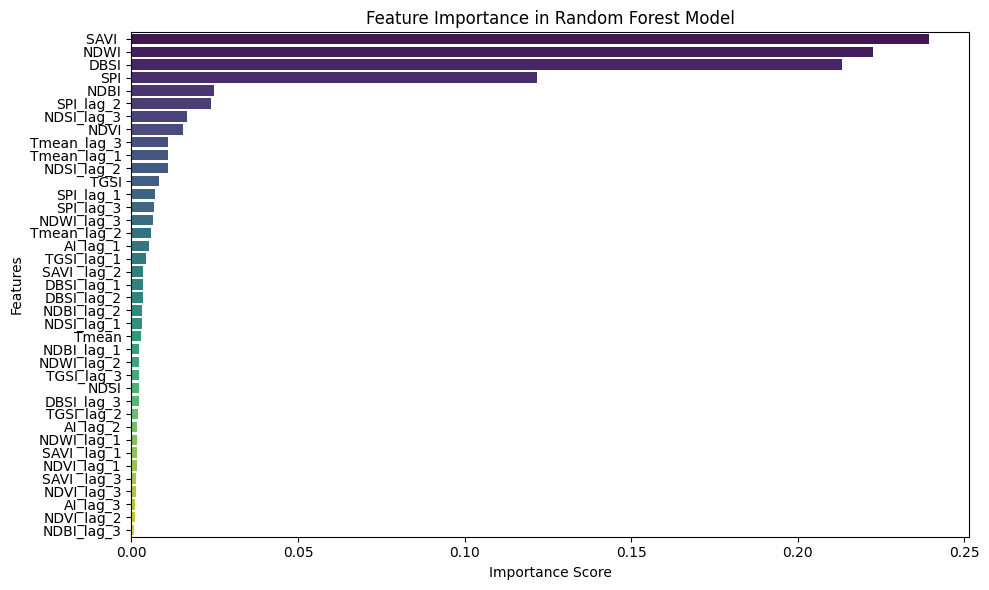

In [ ]:
# ... (rest of the code for model training, evaluation, and CSV export remains the same)

# Step 7: Variable Importance with Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load your data here (replace with your actual data loading code)
# Example:
# data = pd.read_csv('your_data.csv')
# ... (preprocessing steps if needed)

# Separate features and target variable
# Example:
# X = data.drop(columns=['target_variable'])
# y = data['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Parameter grid for hyperparameter tuning
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# Perform Grid Search Cross-Validation
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr,
                               cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search_gbr.best_params_)
print("Best Cross-validation MSE:", -grid_search_gbr.best_score_)

# Get the best model
best_gbr = grid_search_gbr.best_estimator_

# Make predictions and evaluate
y_train_pred_gbr = best_gbr.predict(X_train)
train_mse_gbr = mean_squared_error(y_train, y_train_pred_gbr)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)
print("\nTraining Set:")
print("Mean Squared Error:", train_mse_gbr)
print("R-squared:", train_r2_gbr)

y_test_pred_gbr = best_gbr.predict(X_test)
test_mse_gbr = mean_squared_error(y_test, y_test_pred_gbr)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)
print("\nTest Set:")
print("Mean Squared Error:", test_mse_gbr)
print("R-squared:", test_r2_gbr)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-validation MSE: 0.011524818999415997

Training Set:
Mean Squared Error: 0.0007158353125231244
R-squared: 0.9786420072175941

Test Set:
Mean Squared Error: 0.005773758973998528
R-squared: 0.805615107624789



Predictions exported to train_predictions_gbr_with_dates.csv and test_predictions_gbr_with_dates.csv


<ipython-input-35-942cb358b4b8>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_gbr_df, palette='viridis')


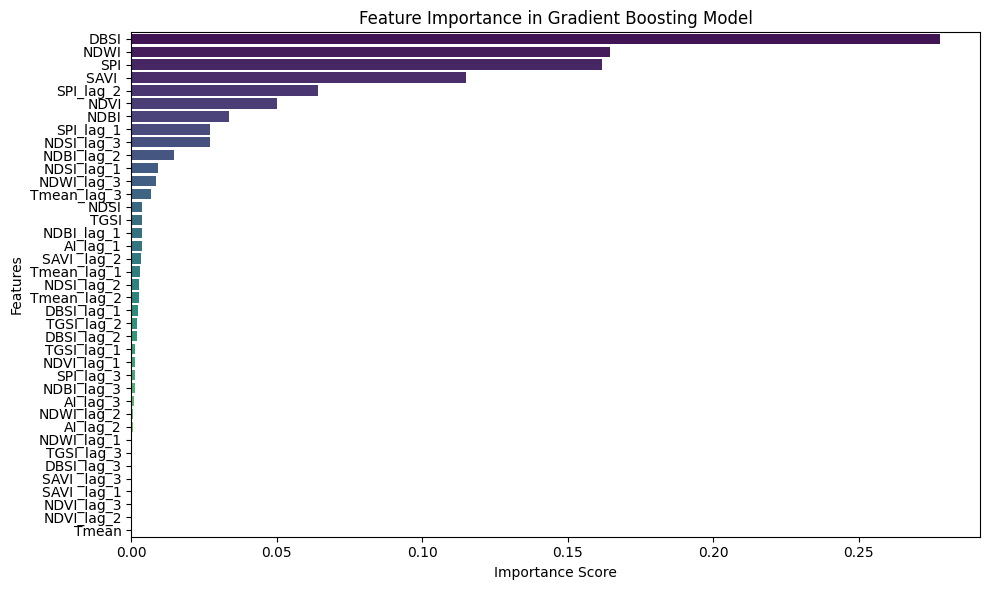

In [ ]:
# Export predictions to CSV with dates
y_train = y_train.reset_index()
y_test = y_test.reset_index()

# Fix the date column name if needed (replace 'ï»¿date' with actual column name if different)
y_train = y_train.rename(columns={'ï»¿date': 'date'})
y_test = y_test.rename(columns={'ï»¿date': 'date'})

train_predictions_gbr_df = pd.DataFrame({'Date': y_train['date'],
                                         'Actual': y_train['AI'],
                                         'Predicted': y_train_pred_gbr})
test_predictions_gbr_df = pd.DataFrame({'Date': y_test['date'],
                                        'Actual': y_test['AI'],
                                        'Predicted': y_test_pred_gbr})

train_predictions_gbr_df.to_csv('train_predictions_gbr_with_dates.csv', index=False)
test_predictions_gbr_df.to_csv('test_predictions_gbr_with_dates.csv', index=False)
print("\nPredictions exported to train_predictions_gbr_with_dates.csv and test_predictions_gbr_with_dates.csv")

# Variable Importance with Plotting
import matplotlib.pyplot as plt
import seaborn as sns

importances_gbr = best_gbr.feature_importances_
feature_names_gbr = X_train.columns

feature_importance_gbr_df = pd.DataFrame({'Feature': feature_names_gbr, 'Importance': importances_gbr})
feature_importance_gbr_df = feature_importance_gbr_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gbr_df, palette='viridis')
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# ... (code for export and plotting remains the same)

# Print Feature Importance Scores
print("\nFeature Importance Scores (Gradient Boosting):")
print(feature_importance_gbr_df)


Feature Importance Scores (Gradient Boosting):
        Feature  Importance
0          DBSI    0.277870
2          NDWI    0.164642
7           SPI    0.161916
5         SAVI     0.115012
34    SPI_lag_2    0.064116
1          NDVI    0.050105
3          NDBI    0.033610
33    SPI_lag_1    0.026899
26   NDSI_lag_3    0.026851
22   NDBI_lag_2    0.014725
24   NDSI_lag_1    0.009178
20   NDWI_lag_3    0.008555
38  Tmean_lag_3    0.006729
4          NDSI    0.003648
6          TGSI    0.003609
21   NDBI_lag_1    0.003576
9      AI_lag_1    0.003541
28  SAVI _lag_2    0.003235
36  Tmean_lag_1    0.002913
25   NDSI_lag_2    0.002732
37  Tmean_lag_2    0.002689
12   DBSI_lag_1    0.002255
31   TGSI_lag_2    0.002035
13   DBSI_lag_2    0.001880
30   TGSI_lag_1    0.001369
15   NDVI_lag_1    0.001302
35    SPI_lag_3    0.001259
23   NDBI_lag_3    0.001152
11     AI_lag_3    0.000884
19   NDWI_lag_2    0.000543
10     AI_lag_2    0.000397
18   NDWI_lag_1    0.000320
32   TGSI_lag_3    0.000282


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load your data here (replace with your actual data loading code)
# Example:
# data = pd.read_csv('your_data.csv')
# ... (preprocessing steps if needed)

# Separate features and target variable
# Example:
# X = data.drop(columns=['target_variable'])
# y = data['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
svr = SVR()

# Parameter grid for hyperparameter tuning
param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}

In [ ]:
# Perform Grid Search Cross-Validation
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr,
                               cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_svr.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search_svr.best_params_)
print("Best Cross-validation MSE:", -grid_search_svr.best_score_)

# Get the best model
best_svr = grid_search_svr.best_estimator_

# Make predictions and evaluate
y_train_pred_svr = best_svr.predict(X_train)
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr)
train_r2_svr = r2_score(y_train, y_train_pred_svr)
print("\nTraining Set:")
print("Mean Squared Error:", train_mse_svr)
print("R-squared:", train_r2_svr)

y_test_pred_svr = best_svr.predict(X_test)
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)
print("\nTest Set:")
print("Mean Squared Error:", test_mse_svr)
print("R-squared:", test_r2_svr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Best Cross-validation MSE: 0.014583692567185572

Training Set:
Mean Squared Error: 0.011674827787086863
R-squared: 0.65166444955958

Test Set:
Mean Squared Error: 0.013423022760598839
R-squared: 0.5480876762574611


In [ ]:
# Export predictions to CSV with dates
y_train = y_train.reset_index()
y_test = y_test.reset_index()

# Fix the date column name if needed (replace 'ï»¿date' with actual column name if different)
y_train = y_train.rename(columns={'ï»¿date': 'date'})
y_test = y_test.rename(columns={'ï»¿date': 'date'})

train_predictions_svr_df = pd.DataFrame({'Date': y_train['date'],
                                         'Actual': y_train['AI'],
                                         'Predicted': y_train_pred_svr})
test_predictions_svr_df = pd.DataFrame({'Date': y_test['date'],
                                        'Actual': y_test['AI'],
                                        'Predicted': y_test_pred_svr})

train_predictions_svr_df.to_csv('train_predictions_svr_with_dates.csv', index=False)
test_predictions_svr_df.to_csv('test_predictions_svr_with_dates.csv', index=False)
print("\nPredictions exported to train_predictions_svr_with_dates.csv and test_predictions_svr_with_dates.csv")


Predictions exported to train_predictions_svr_with_dates.csv and test_predictions_svr_with_dates.csv
